In [26]:
# IMPORTING ALL REQUIRED LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.preprocessing import*
import os
from sklearn import preprocessing
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [28]:
# LOADING THE DATASET : FASHION MNIST
df = pd.read_csv("C:/Users/dell/Desktop/Ml/dataset/fashion-mnist_test.csv")
df


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


In [30]:
# X CONTAINS DATA EXCEPT COLUMNN - "LABEL"
# Y CONTAINS COLUMN - "LABEL"
x=df.drop(["label"],axis=1)
y=df["label"]
x.shape,y.shape
x.describe

<bound method DataFrame.describe of       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0          0       0       0       0       0       0       0       9       8   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0      14      53      99   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0      44     105      44      10   
6          0       0       0       0       0       0       0       0       0   
7          0       0       0       0       0       0       0       1       0   
8          0       0       0       0       0       0       0       0       0   
9          0       0       0       0       0       0       0       0       0   
10         0       0       0       0       0       0       0       1       0   
11  

In [32]:
# NORMALIZING X
z = preprocessing.normalize(x)
z
z1 = preprocessing.scale(z)
z1
z1.shape
# NOW z1 IS NEW x

(10000L, 784L)

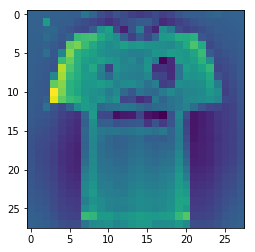

In [34]:
# VIEWING THE IMAGE 
plt.imshow(z1[0].reshape(28,28))

In [36]:
# IMPLEMENTING CLASSIFIER MODELS
# BAGGING CLASSIFIER
model = DecisionTreeClassifier()
num_trees = 100
model1 = BaggingClassifier(base_estimator=model)
model1


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [38]:
# SPLITTING THE DATA INTO TRAIN AND TEST
z1_train,z1_test,y_train,y_test=train_test_split(z1,y,test_size=0.3)


In [40]:
model1.fit(z1_train,y_train)
pred = model1.predict(z1_test)
metrics.accuracy_score(y_test,pred)
print(classification_report(y_test,pred))
confusion_matrix(y_test,pred)

             precision    recall  f1-score   support

          0       0.73      0.78      0.76       301
          1       0.95      0.97      0.96       291
          2       0.67      0.73      0.70       293
          3       0.86      0.86      0.86       308
          4       0.72      0.75      0.73       318
          5       0.88      0.93      0.91       307
          6       0.60      0.48      0.54       316
          7       0.89      0.85      0.87       282
          8       0.95      0.93      0.94       298
          9       0.91      0.90      0.90       286

avg / total       0.81      0.82      0.81      3000



array([[235,   2,   9,   9,   2,   1,  39,   0,   4,   0],
       [  2, 281,   0,   6,   0,   0,   2,   0,   0,   0],
       [  7,   0, 213,   1,  44,   0,  27,   0,   1,   0],
       [  8,  11,  10, 265,   7,   1,   6,   0,   0,   0],
       [  4,   1,  38,  15, 239,   0,  19,   0,   2,   0],
       [  0,   0,   0,   1,   0, 286,   0,  14,   3,   3],
       [ 64,   1,  43,  11,  41,   1, 153,   0,   2,   0],
       [  0,   0,   0,   0,   0,  18,   0, 240,   2,  22],
       [  1,   0,   4,   1,   1,   4,   7,   2, 278,   0],
       [  0,   0,   0,   0,   0,  14,   0,  14,   2, 256]], dtype=int64)

In [42]:
# RANDOM FOREST CLASSIFIER
rf=RandomForestClassifier()
rf.fit(z1_train,y_train)
pred1 = rf.predict(z1_test)
metrics.accuracy_score(y_test,pred1)
print(classification_report(y_test,pred1))
confusion_matrix(y_test,pred1)

             precision    recall  f1-score   support

          0       0.71      0.78      0.74       301
          1       0.94      0.94      0.94       291
          2       0.64      0.71      0.68       293
          3       0.83      0.86      0.85       308
          4       0.69      0.73      0.71       318
          5       0.91      0.92      0.91       307
          6       0.65      0.47      0.54       316
          7       0.87      0.86      0.86       282
          8       0.96      0.96      0.96       298
          9       0.89      0.90      0.89       286

avg / total       0.81      0.81      0.81      3000



array([[234,   2,  11,  19,   1,   0,  31,   0,   3,   0],
       [  2, 273,   4,   9,   1,   0,   2,   0,   0,   0],
       [  4,   2, 209,   1,  52,   0,  22,   0,   3,   0],
       [  9,  11,   4, 265,  12,   0,   7,   0,   0,   0],
       [  1,   2,  48,  17, 232,   0,  17,   0,   1,   0],
       [  0,   0,   0,   0,   0, 281,   0,  16,   2,   8],
       [ 78,   0,  45,   7,  36,   0, 147,   0,   3,   0],
       [  0,   0,   0,   0,   0,  16,   0, 242,   0,  24],
       [  1,   0,   4,   0,   1,   3,   1,   1, 286,   1],
       [  0,   0,   0,   0,   0,   8,   0,  19,   1, 258]], dtype=int64)

In [44]:
# GRADIENT BOOSTING CLASSIFIER
model2 = GradientBoostingClassifier(n_estimators=30,verbose=1)
model2
model2.fit(z1_train,y_train)
pred2 = model2.predict(z1_test)
metrics.accuracy_score(y_test,pred2)
print(classification_report(y_test,pred2))
confusion_matrix(y_test,pred2)

      Iter       Train Loss   Remaining Time 
         1       12850.7118            3.78m
         2       11070.2037            3.62m
         3        9775.0255            3.47m
         4        8791.5379            3.36m
         5        7999.5853            3.21m
         6        7301.5934            3.07m
         7        6738.6148            2.93m
         8        6245.8784            2.80m
         9        5834.3439            2.67m
        10        5458.0801            2.55m
        20        3330.6116            1.26m
        30        2425.5130            0.00s
             precision    recall  f1-score   support

          0       0.78      0.75      0.77       301
          1       0.97      0.96      0.96       291
          2       0.71      0.72      0.71       293
          3       0.82      0.87      0.84       308
          4       0.73      0.74      0.73       318
          5       0.92      0.89      0.90       307
          6       0.60      0.58      0.59

array([[226,   1,   6,  20,   3,   1,  37,   1,   6,   0],
       [  1, 278,   2,   8,   0,   0,   2,   0,   0,   0],
       [  3,   0, 210,   1,  47,   0,  29,   0,   3,   0],
       [  7,   5,   3, 269,  10,   0,  14,   0,   0,   0],
       [  0,   3,  32,  15, 236,   0,  32,   0,   0,   0],
       [  0,   0,   0,   1,   0, 272,   0,  23,   1,  10],
       [ 51,   0,  38,  14,  27,   0, 183,   0,   3,   0],
       [  0,   0,   0,   0,   0,  15,   0, 240,   0,  27],
       [  0,   0,   5,   2,   1,   2,   7,   4, 277,   0],
       [  0,   0,   0,   0,   1,   5,   0,  11,   0, 269]], dtype=int64)

In [45]:
# COMPARING DIFFERENT CLASSIFIERS
list = []
h1 = LogisticRegression()
h2 = DecisionTreeClassifier()
h3 = svm.SVC()
list = VotingClassifier([('LogisticRegression', h1), ('DecisionTreeClassifier', h2), ('SVM', h3)])
list
list.fit(z1_train,y_train)
pred3 = list.predict(z1_test) 
metrics.accuracy_score(y_test,pred3)
print(classification_report(y_test,pred3))
confusion_matrix(y_test,pred3)

             precision    recall  f1-score   support

          0       0.71      0.85      0.77       301
          1       0.96      0.97      0.96       291
          2       0.66      0.73      0.69       293
          3       0.83      0.87      0.85       308
          4       0.75      0.78      0.77       318
          5       0.92      0.91      0.91       307
          6       0.71      0.46      0.56       316
          7       0.90      0.86      0.88       282
          8       0.94      0.95      0.94       298
          9       0.92      0.93      0.93       286

avg / total       0.83      0.83      0.82      3000



C:\Users\dell\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[256,   0,   7,  12,   0,   1,  20,   0,   5,   0],
       [  2, 282,   2,   4,   0,   0,   1,   0,   0,   0],
       [ 10,   0, 213,   2,  49,   0,  16,   0,   3,   0],
       [ 15,   7,   5, 268,   8,   1,   4,   0,   0,   0],
       [  3,   2,  38,  14, 249,   0,  12,   0,   0,   0],
       [  0,   1,   1,   3,   0, 279,   0,  13,   4,   6],
       [ 74,   2,  50,  15,  25,   0, 146,   0,   4,   0],
       [  0,   0,   1,   1,   0,  20,   0, 242,   2,  16],
       [  2,   1,   2,   1,   0,   1,   6,   2, 283,   0],
       [  0,   0,   2,   3,   0,   2,   0,  12,   0, 267]], dtype=int64)

# EVERY MODEL'S ACCURACY SCORE, CLASSIFICATION REPORT AND CONFUSION MATRIX IS ALSO SHOWN...!